In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import matplotlib.cm as cm

# special imports for scaling maps!
import copy
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns

# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)


# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'


from soursop.sstrajectory import SSTrajectory


Bad key "text.kerning_factor" on line 4 in
/home/alstonj/miniconda3/envs/labconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
Ortholog = 'HKU1_HKU1'

In [3]:
WT = {}
WT_std = {}
AFRC = {}

#prefix = "/work/alstonj/2022/Binding/FINAL/NTDRBD/"

prefix = "./Data/"

for i in [Ortholog]:
    hold = []
    for a in [1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]:
        wt = np.loadtxt(prefix + f'{i}/Bound/{a}/distance_map.csv', delimiter=',')
        hold.append(wt)
        
    WT[i] = np.mean(hold, axis = 0)
    WT_std[i] = np.std(hold, axis = 0)
    
    

In [4]:
prefix = "./Data/"

for i in [Ortholog]:
    hold = []
    for a in [1, 2, 3, 4, 5]:
        wt = np.loadtxt(prefix + f'{i}/0/{a}/distance_map.csv', delimiter=',')
        hold.append(wt)
        
    WT['0'] = np.mean(hold, axis = 0)
    WT_std[i] = np.std(hold, axis = 0)

/home/alstonj/miniconda3/envs/labconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


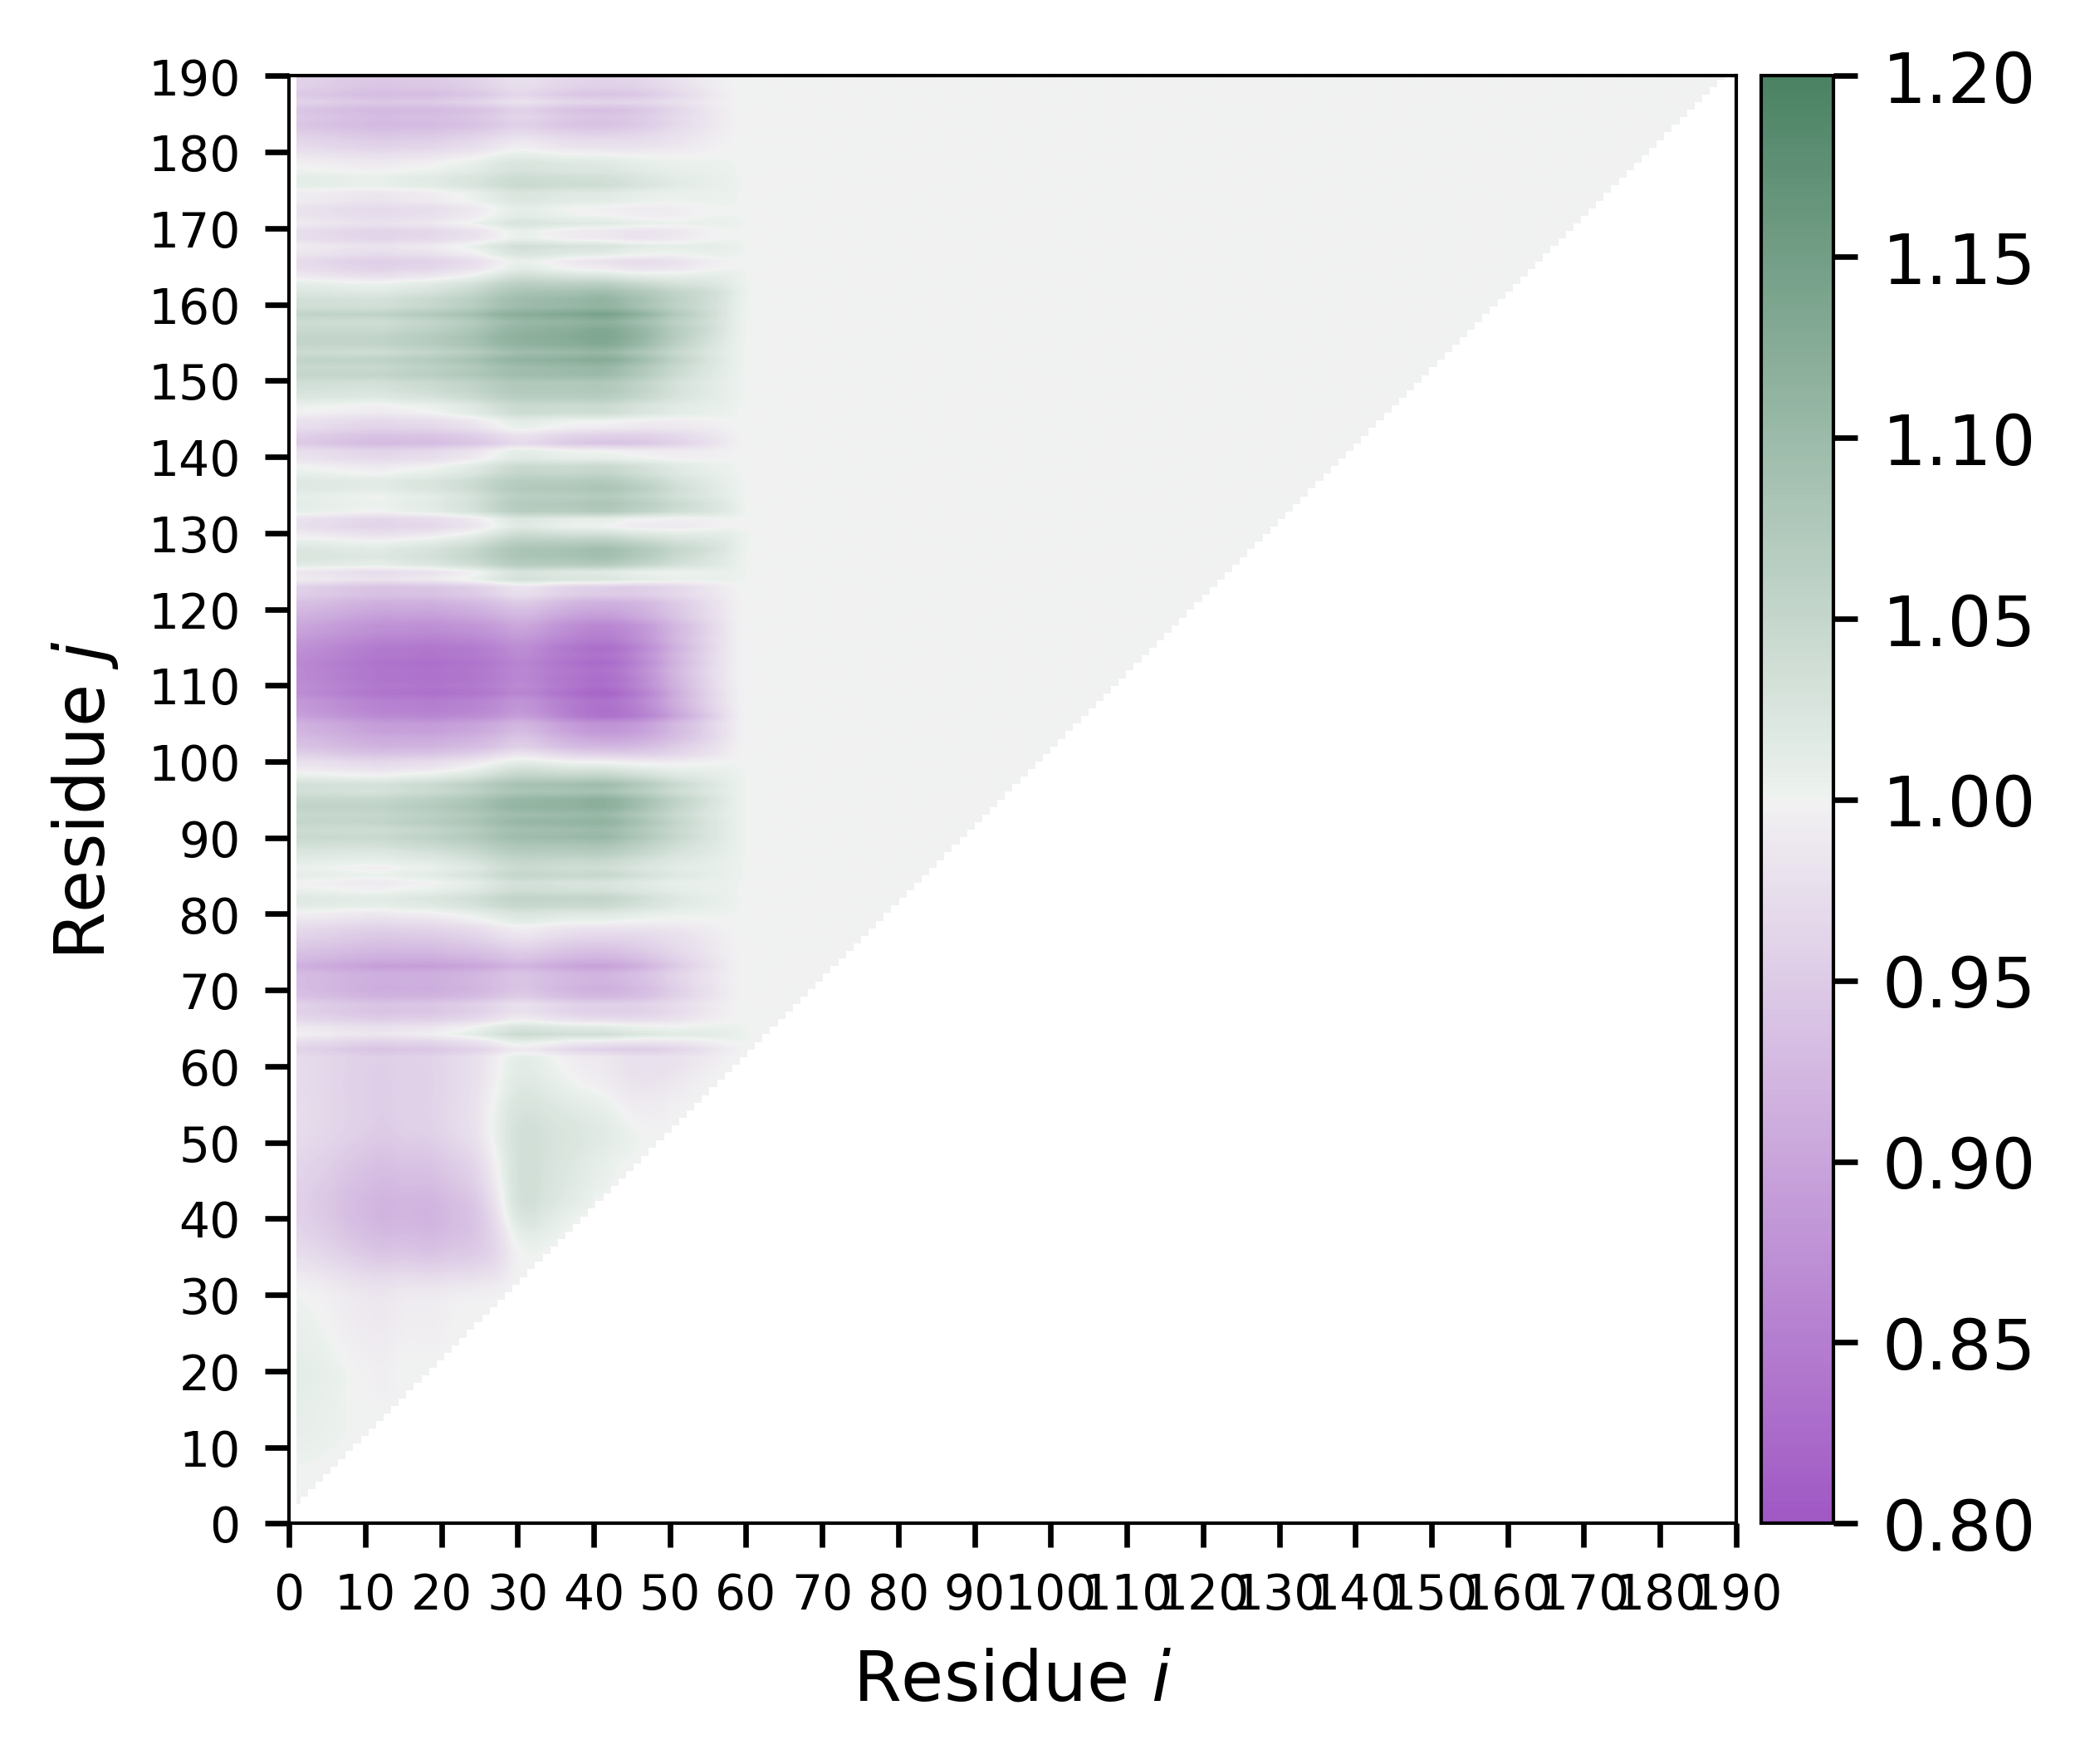

In [5]:
# build the scaling map matrix and convert any NaNs to zero
scaling_map = WT[Ortholog]/WT['0']
scaling_map = np.nan_to_num(scaling_map)


# get size of scaling map
max_extent = scaling_map.shape[0]

# set up the figure
fig = figure(num=None, figsize=(4, 4), dpi=300, facecolor='w', edgecolor='k')
ax_list = fig.axes

# flip data for plotting around and build a mask
data = scaling_map.transpose()
masked_array = np.ma.masked_where(data == 0, data)

cmap = sns.diverging_palette(145, 290, s=60, as_cmap=True)

cmap = cmap.reversed()

# generate actual image
im = plt.imshow(masked_array,cmap=cmap, interpolation='bilinear',
                   origin='lower', extent=[1, max_extent, 1, max_extent],
                   vmax=1.2, vmin=.8)


plt.xlabel('Residue $i$')
plt.ylabel('Residue $j$') 
plt.xticks(np.arange(0, data.shape[0]+1, 10),fontsize=7)
plt.yticks(np.arange(0, data.shape[0]+1, 10),fontsize=7)


ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

    

plt.colorbar(cax=cax)

plt.savefig(f'Analysis/Plots/DistanceMap_Norm_0_{Ortholog}.pdf')
plt.savefig(f'Analysis/Plots/DistanceMap_Norm_0_{Ortholog}.png')